<a href="https://colab.research.google.com/github/Shubham1966/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Q: Perform data cleaning and exploratory data analysis (EDA) on a data set of your choice, such as a titanic data set from the Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

In [2]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

In [3]:
## Display the first few rows of the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
## Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
## Data Cleaning
## Handling missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [6]:
## Dropping unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
## Convert categorical variables into numerical ones
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

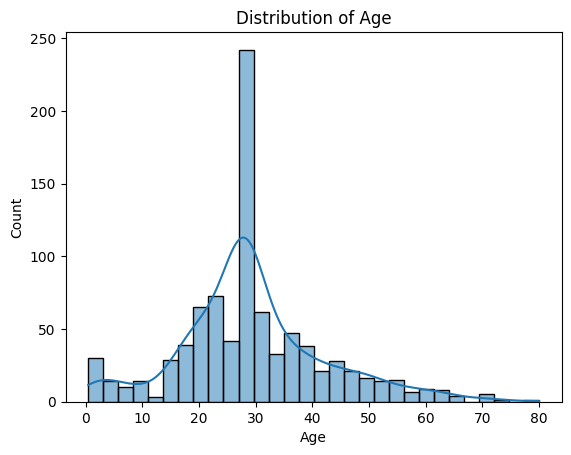

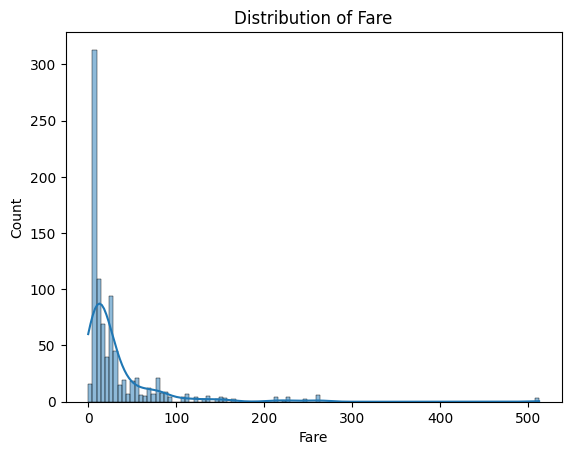

In [9]:
## Exploratory Data Analysis (EDA)
## Distribution of numerical variables
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

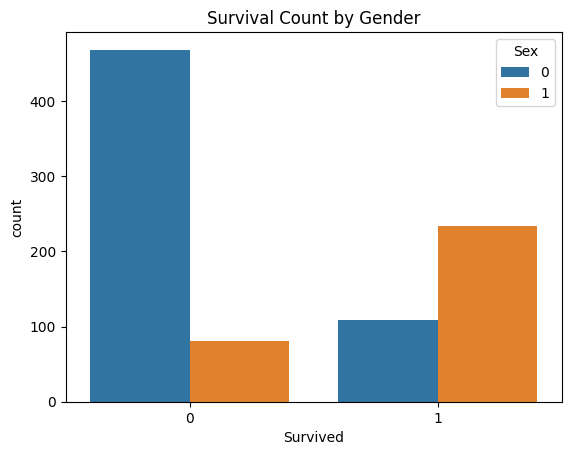

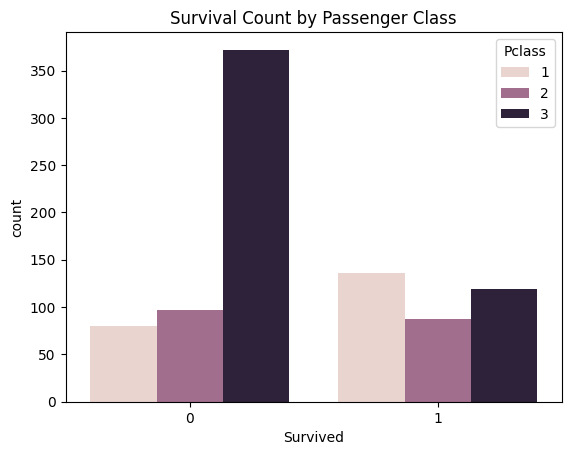

In [10]:
## Relationship between variables
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.show()

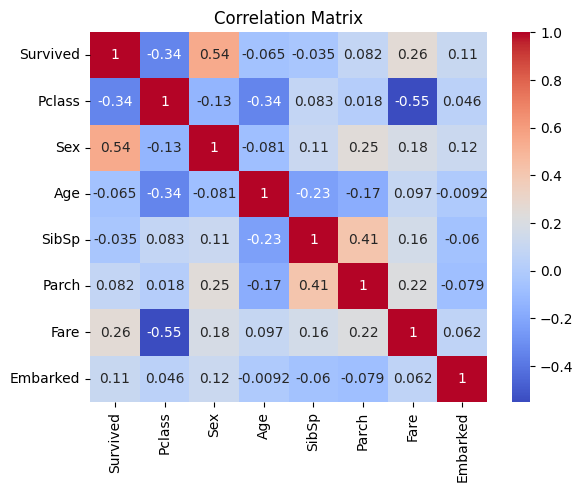

In [11]:
## Correlation matrix
corr_matrix = titanic_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## Summarize Discoveries
## From the survival count by gender plot, it appears that females exhibited a greater likelihood of survival in contrast to males.
## Passengers occupying higher classes (Pclass) demonstrated elevated survival rates in comparison to those in lower classes.
## A negative correlation between 'Pclass' and 'Survived' suggests that individuals in higher classes had an increased probability of survival.
## A positive correlation between 'Fare' and 'Survived' implies that passengers who paid higher fares were more likely to survive the Titanic disaster.